In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime,timedelta

### Import the dataset from this Customer ,prod_info and transaction.csv from the folder

In [3]:
customer_acqusition= pd.read_csv('E:/BA/Python/1. Python Basic Exercises_For_Submission/4. Pandas Case Study 2 - Credit Card Case Study/4. Pandas Case Study 2 - Credit Card Case Study/Customer Acqusition.csv')
spend = pd.read_csv('E:/BA/Python/1. Python Basic Exercises_For_Submission/4. Pandas Case Study 2 - Credit Card Case Study/4. Pandas Case Study 2 - Credit Card Case Study/spend.csv')
repayment= pd.read_csv('E:/BA/Python/1. Python Basic Exercises_For_Submission/4. Pandas Case Study 2 - Credit Card Case Study/4. Pandas Case Study 2 - Credit Card Case Study/Repayment.csv')

In [4]:
customer_acqusition.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [5]:
customer_acqusition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
No          100 non-null int64
Customer    100 non-null object
Age         100 non-null int64
City        100 non-null object
Product     100 non-null object
Limit       100 non-null float64
Company     100 non-null object
Segment     100 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [6]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [7]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
Sl No:      1500 non-null int64
Customer    1500 non-null object
Month       1500 non-null object
Type        1500 non-null object
Amount      1500 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [8]:
spend['Month']=spend['Month'].apply(lambda x:pd.to_datetime(x))

In [9]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
SL No:        1499 non-null float64
Customer      1500 non-null object
Month         1500 non-null object
Amount        1500 non-null float64
Unnamed: 4    0 non-null float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


In [10]:
repayment['Month']=repayment['Month'].apply(lambda x:pd.to_datetime(x))

In [11]:
repayment.drop(columns='Unnamed: 4',inplace=True)

In [12]:
repayment.dropna(axis=0,inplace=True)

In [13]:
customer_acqusition.drop(columns='No',inplace=True)

In [14]:
customer_acqusition.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


### 1. In the above dataset,  a. In case age is less than 18, replace it with mean of age values

In [15]:
customer_acqusition.loc[customer_acqusition.Age < 18,'Age'] = customer_acqusition.Age.mean()


### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [16]:
customer_spend=pd.merge(customer_acqusition,spend,on='Customer')
customer_spend.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13


In [17]:
customer_spend['Amount'] = np.where(customer_spend.Amount>customer_spend.Limit,customer_spend.Limit/2,customer_spend.Amount)
customer_spend['Amount'].head(2)

0    485470.80
1    410556.13
Name: Amount, dtype: float64

### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [18]:
customer_repayment=pd.merge(customer_acqusition,repayment,on='Customer')
customer_repayment.head(1)

,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02


In [19]:

customer_repayment['Amount'] = np.where(customer_repayment.Amount>customer_repayment.Limit,customer_repayment.Limit,customer_repayment.Amount)
customer_repayment['Amount'].head(2)

0    245899.02
1    259490.06
Name: Amount, dtype: float64

### 2. From the above dataset create the following summaries: a. How many distinct customers exist?

In [20]:
customer_spend['Customer'].drop_duplicates().count()

100

### b. How many distinct categories exist?

In [21]:
customer_spend['Product'].drop_duplicates().count()

3

### c. What is the average monthly spend by customers?

In [22]:
customer_spend.groupby(['Customer','Month']).Amount.mean().reset_index()

,Customer,Month,Amount
0,A1,2004-01-03,410556.130
1,A1,2004-01-12,463017.010
2,A1,2004-01-15,23740.460
3,A1,2004-01-25,439656.715
4,A1,2004-02-05,52208.650
...,...,...,...
1252,A95,2004-01-15,240401.500
1253,A96,2004-01-25,54729.660
1254,A97,2004-01-12,5000.000
1255,A98,2004-01-03,5000.500


### d. What is the average monthly repayment by customers?

In [23]:
customer_repayment.groupby(['Customer','Month']).Amount.mean().reset_index()

,Customer,Month,Amount
0,A1,2004-01-03,245899.02
1,A1,2004-01-12,350446.82
2,A1,2004-01-15,356258.85
3,A1,2004-01-25,437555.12
4,A1,2004-02-05,117964.43
...,...,...,...
1276,A95,2004-01-15,369405.96
1277,A96,2004-01-25,100000.00
1278,A97,2004-01-12,10000.00
1279,A98,2004-01-03,10001.00


### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

####  f. What are the top 5 product types?

In [24]:
customer_spend.groupby('Type').Amount.sum().reset_index().sort_values('Amount',ascending=False).head(5)

,Type,Amount
10,PETRO,28597384.98
4,CAMERA,27690738.44
7,FOOD,20519243.60
0,AIR TICKET,20155847.12
14,TRAIN TICKET,19995825.72


### g. Which city is having maximum spend?

In [25]:
customer_spend.groupby('City').Amount.sum().reset_index().sort_values('Amount',ascending=False).head(1)

,City,Amount
4,COCHIN,45963513.5


#### h. Which age group is spending more money?

In [26]:
customer_spend.groupby('Age').Amount.sum().reset_index().sort_values('Amount',ascending=False).head(1)

,Age,Amount
6,28.0,17365270.23


#### i. Who are the top 10 customers in terms of repayment? 

In [27]:
customer_repayment.groupby('Customer').Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

,Customer,Amount
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
6,A14,7943268.63
39,A44,7744730.12
33,A39,7622483.30
37,A42,7615460.86


#### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same

In [28]:
pd.pivot_table(data = customer_spend, index = 'City', columns='Product', values='Amount', aggfunc='sum')

Product,Gold,Platimum,Silver
City,,,
BANGALORE,34212852.62,2710848.54,3537945.86
BOMBAY,23888016.12,2581199.89,2133911.37
CALCUTTA,28948029.55,10061993.27,2098109.48
CHENNAI,7504852.70,13614532.10,1009250.85
COCHIN,29925605.56,13301418.07,2736489.87
DELHI,7728443.59,954459.47,2235383.48
PATNA,7601365.36,5252438.32,2406783.29
TRIVANDRUM,6391189.56,7910523.72,1035442.59


#### 4. Create graphs for a. Monthly comparison of total spends, city wise

In [29]:
customer_spend['Monthly_Spend']=customer_spend.Month.apply(lambda x:x.month)

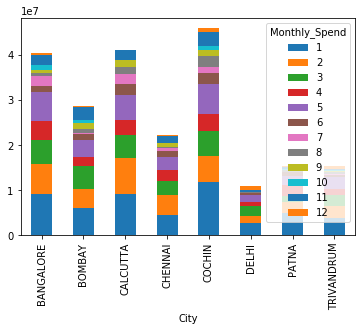

In [30]:
pd.pivot_table(data = customer_spend, index = 'City', columns='Monthly_Spend', 
               values='Amount', aggfunc='sum').plot(kind='bar',stacked=True)

#### b. Comparison of yearly spend on air tickets

In [31]:
customer_spend['Yearly_Spend']=customer_spend['Month'].apply(lambda x:x.year)

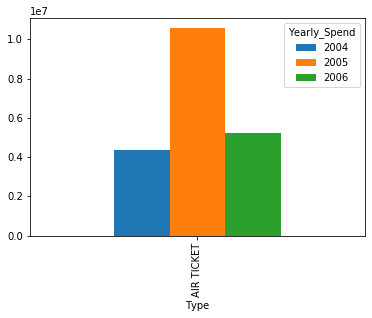

In [32]:
pd.pivot_table(data = customer_spend[customer_spend.Type=='AIR TICKET'], index = 'Type', columns='Yearly_Spend', 
               values='Amount', aggfunc='sum').plot(kind='bar')
plt.show()

#### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

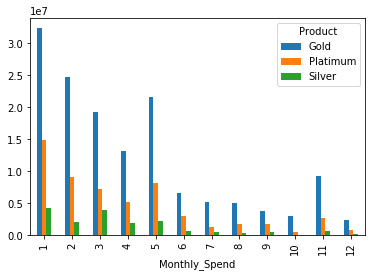

In [33]:
pd.pivot_table(data = customer_spend, index = 'Monthly_Spend', columns='Product', 
               values='Amount', aggfunc='sum').plot(kind='bar')

#### 5. Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers

In [34]:
customer_repayment['yearly']=customer_repayment.Month.apply(lambda x:x.year)
customer_repayment['monthly']=customer_repayment.Month.apply(lambda x:x.month)

In [35]:
def top10Customers(product_category,time_period):
    return customer_repayment.loc[(customer_repayment.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [36]:
product_category=str(input("Please Enter Product Category it should be in Gold/Silver/Platinum: "))
time_period=str(input("Please Enter Time Period it should be in yearly/monthly: "))

Please Enter Product Category it should be in Gold/Silver/Platinum: Gold
Please Enter Time Period it should be in yearly/monthly: yearly


In [40]:
top10Customers=top10Customers(product_category,time_period)

In [41]:
top10Customers

,Customer,City,Product,yearly,Amount
64,A61,COCHIN,Gold,2005,4276860.55
55,A44,DELHI,Gold,2005,4165317.77
58,A45,COCHIN,Gold,2005,4042447.57
52,A43,BANGALORE,Gold,2005,4006956.60
13,A13,BANGALORE,Gold,2005,3757673.00
65,A61,COCHIN,Gold,2006,3744127.41
61,A60,CALCUTTA,Gold,2005,3742856.10
14,A13,BANGALORE,Gold,2006,3477314.89
38,A29,CALCUTTA,Gold,2006,3434298.00
35,A28,TRIVANDRUM,Gold,2006,3376614.65
